## Statsmodels version 0.13.5 is required for dcurves
pip install statsmodels==0.13.5



In [ ]:
pip install statsmodels==0.13.5

In [ ]:
pip install dcurves

In [ ]:
pip install lifelines

In [ ]:
pip install scipy==1.8.0

In [1]:
import pandas as pd
import joblib
import lifelines
import statsmodels
import dcurves
import numpy as np
from dcurves import dca, plot_graphs
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Miller_2023_train_DR_imputed.csv')
df_validate = pd.read_csv('Miller_2023_validate_DR_imputed.csv')

In [3]:
df_train['REC_GRAFT_STAT'].value_counts(normalize=True)

REC_GRAFT_STAT
0.0    0.695299
1.0    0.304701
Name: proportion, dtype: float64

In [4]:
# Assuming df1 and df2 are already defined with a 'REC_CTR_CD' column

# Get the unique recipient center codes in both dataframes
unique_df_train = set(df_train['REC_CTR_CD'])
unique_df_validate = set(df_validate['REC_CTR_CD'])

# Remove rows in df1 where REC_CTR_CD is not in df2
df_train_filtered = df_train[df_train['REC_CTR_CD'].isin(unique_df_validate)]

# Remove rows in df2 where REC_CTR_CD is not in df1
df_validate_filtered = df_validate[df_validate['REC_CTR_CD'].isin(unique_df_train)]

In [5]:
df_train = df_train_filtered

df_validate = df_validate_filtered

In [6]:
df_train.dropna(inplace=True)
df_validate.dropna(inplace=True)

In [7]:
df_train['Graft_Survival_Time'] = (df_train['Graft_Survival_Time'])/364
df_validate['Graft_Survival_Time'] = (df_validate['Graft_Survival_Time'])/364

In [8]:
from lifelines import CoxPHFitter

In [9]:
# DONOR-RECIPIENT MODEL FITTED W/ RACE VARIABLE

cph = CoxPHFitter()

cph.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula = "DON_AGE + DON_RACE_SRTR + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_ANTI_HCV + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI "
    
)

Iteration 1: norm_delta = 3.43e-01, step_size = 0.9500, log_lik = -115082.00714, newton_decrement = 1.23e+03, seconds_since_start = 1.8
Iteration 2: norm_delta = 2.20e-02, step_size = 0.9500, log_lik = -113893.09189, newton_decrement = 4.70e+00, seconds_since_start = 3.7
Iteration 3: norm_delta = 1.29e-03, step_size = 0.9500, log_lik = -113888.36697, newton_decrement = 1.87e-02, seconds_since_start = 5.9
Iteration 4: norm_delta = 1.72e-06, step_size = 1.0000, log_lik = -113888.34821, newton_decrement = 4.45e-08, seconds_since_start = 7.7
Convergence success after 4 iterations.


<lifelines.CoxPHFitter: fitted with 67044 total observations, 46576 right-censored observations>

In [10]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 67044 total observations, 46576 right-censored observations>
             duration col = 'Graft_Survival_Time'
                event col = 'REC_GRAFT_STAT'
                   strata = REC_CTR_CD
      baseline estimation = breslow
   number of observations = 67044
number of events observed = 20468
   partial log-likelihood = -113888.35
         time fit was run = 2024-11-08 01:22:42 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
DON_AGE                         0.01      1.01      0.00            0.01            0.01                1.01                1.01
DON_RACE_SRTR                   0.16      1.17      0.02            0.12            0.20                1.12                1.22
DON_CREAT                       0.06      1.06      0.01            0.03            0.08                1.04                1.08
DON_HIST_HTN                    0.11      1.11      0.02            0.07            0.14                1.07                1.15
DON_HIST_DB                     0.10      1.11      0.03            0.04            0.17                1.04                1.18
DON_COD_DON_STROKE              0.08      1.08      0.02            0.04            0.11                1.04                1.12
DON_ANTI_HCV                    0.27      1.31      0.05            0.17            0.37                1.19                1.45
DON_HGT_CM                     -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
DON_WGT_KG                     -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
DON_CARDIAC_ARREST_AFTER_DEATH -0.26      0.77      0.06           -0.37           -0.14                0.69                0.87
REC_B_MM_EQUIV_TX              -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
REC_DR_MM_EQUIV_TX              0.04      1.04      0.01            0.02            0.06                1.02                1.07
REC_COLD_ISCH_TM                0.01      1.01      0.00            0.01            0.01                1.01                1.01
EN_BLOC                        -0.11      0.90      0.07           -0.25            0.04                0.78                1.04
REC_AGE_AT_TX                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
REC_DIAB                        0.13      1.14      0.02            0.10            0.16                1.10                1.18
REC_HTN                         0.03      1.03      0.02           -0.01            0.07                0.99                1.07
CAN_RACE_SRTR                   0.26      1.30      0.02            0.23            0.29                1.25                1.34
REC_DGN                        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
CAN_PREV_TXFUS                  0.19      1.21      0.02            0.16            0.22                1.17                1.24
CAN_WGT_KG                      0.00      1.00      0.00            0.00            0.00                1.00                1.00
CAN_LAST_SRTR_PEAK_PRA          0.00      1.00      0.00            0.00            0.00                1.00                1.00
REC_DIAL_YRS                    0.01      1.01      0.00            0.01            0.02                1.01                1.02
CAN_ANGINA                     -0.17      0.85      0.02           -0.21           -0.12                0.81                0.89
CAN_PERIPH_VASC                 0.29      1.33      0.03            0.22            0.36                1.25                1.43
REC_HCV_STAT                    0.22      1.24      0.03            0.16            0.

In [11]:
# Graft Failure prediction at 5 years

cph_pred_vals = \
    cph.predict_survival_function(df_validate,
                                    times = [5])


                                   
df_validate['graft_failure_5_years'] = [1-val for val in cph_pred_vals.iloc[0,:]]

In [12]:
from dcurves import dca, plot_graphs

/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:154: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risks_df[modelname].replace(
/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:157: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

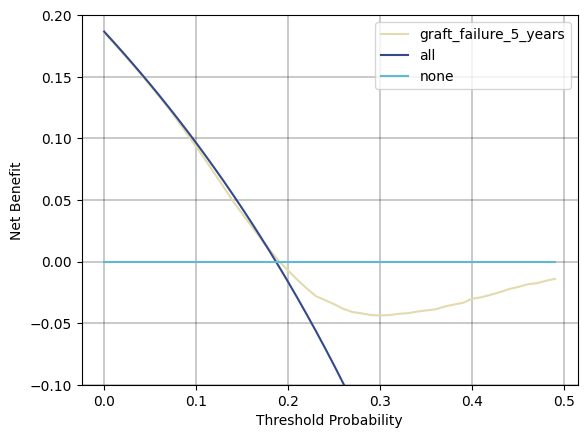

In [13]:
# Donor and Recipient Characteristics, With Race

stdca_coxph_results = \
          dca(
              data=df_validate,
              outcome='REC_GRAFT_STAT',
              modelnames=['graft_failure_5_years'],
              thresholds=np.arange(0, 0.5, 0.01),
              time=5,
              time_to_outcome_col='Graft_Survival_Time'
          )
  
plot_graphs(
    plot_df=stdca_coxph_results,
    graph_type='net_benefit',
    y_limits=[-0.1, 0.2]
  )

In [14]:
coefficients = cph.params_
print(coefficients)

covariate
DON_AGE                           0.012222
DON_RACE_SRTR                     0.160009
DON_CREAT                         0.058154
DON_HIST_HTN                      0.107797
DON_HIST_DB                       0.102371
DON_COD_DON_STROKE                0.076404
DON_ANTI_HCV                      0.272184
DON_HGT_CM                       -0.003856
DON_WGT_KG                       -0.004199
DON_CARDIAC_ARREST_AFTER_DEATH   -0.255506
REC_B_MM_EQUIV_TX                -0.013776
REC_DR_MM_EQUIV_TX                0.043853
REC_COLD_ISCH_TM                  0.010835
EN_BLOC                          -0.107823
REC_AGE_AT_TX                    -0.000350
REC_DIAB                          0.131724
REC_HTN                           0.026851
CAN_RACE_SRTR                     0.260066
REC_DGN                          -0.000032
CAN_PREV_TXFUS                    0.187876
CAN_WGT_KG                        0.001757
CAN_LAST_SRTR_PEAK_PRA            0.001531
REC_DIAL_YRS                      0.010374
C

In [15]:

# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



kdri_thresholds = (0.5, 2.9, 0.5)  # KDRI thresholds 
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefits
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Will always be 0 since all transplants are declined

# Calculate total positives (graft survival) and negatives (graft failure)
total_negatives = df_validate['REC_GRAFT_STAT'].sum()
total_positives = N - total_positives

# Loop over each threshold to calculate net benefits
for threshold in kdri_thresholds:
    # Predictions based on the current threshold
    predicted_survival = (df_validate['KDRI'] <= threshold).astype(int) # threshold = kdri_threshold (flip direction to predict survival) 
    
    # True Positives (TP): correctly predicted graft survival
    TP = ((predicted_failure == 0) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()

    # False Positives (FP): incorrectly predicted graft survival
    FP = ((predicted_failure == 0) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()

    
    # Calculate net benefit for the model at the current threshold
    net_benefit = (TP / N) - (FP / N) * (threshold / (1 - threshold)) # threshold = probability threshold
    net_benefit_model.append(net_benefit)
    
    # Calculate net benefit for "Accept All" (accepting all transplants)
    # All transplants are accepted, resulting in both correct and incorrect predictions of graft survival
    TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # Correctly predicted graft survivals
    FN_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # Missed graft survivals (actual failures)

    net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * (threshold / (1 - threshold))
    net_benefit_accept_all.append(net_benefit_accept_all_value)

    # Calculate net benefit for "Accept None" (no transplants accepted)
    # Since no transplants are accepted, no graft survival can occur
    net_benefit_accept_none_value = 0  # No net benefit when no transplants are accepted
    net_benefit_accept_none.append(net_benefit_accept_none_value)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, net_benefit_model, label='Cox Model Prediction (Donor-Only w/ Race)', color='blue')
plt.plot(thresholds, net_benefit_accept_all, label='Accept All Transplants', linestyle='--', color='red')
plt.plot(thresholds, net_benefit_accept_none, label='Accept No Transplants', linestyle='--', color='green')

plt.xlabel("Threshold Probability (KDRI)")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy")

plt.ylim(-2, 2) 

plt.legend()
plt.grid(True)
plt.show()
    

NameError: name 'total_positives' is not defined

# Donor/Recipient without Race Term

In [ ]:
df_train = df_validate.drop('DON_RACE_SRTR', axis=1)
df_validate = df_validate.drop('DON_RACE_SRTR', axis=1)

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
# Donor Recipient model without race term

cph1 = CoxPHFitter()

cph1.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula=( "DON_AGE  + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_ANTI_HCV + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI")
)

cph1.print_summary()

In [ ]:
cph_pred_vals = \
    cph1.predict_survival_function(df_validate,
                                    times = [5])


                                   
df_validate['graft_failure_5_years'] = [1-val for val in cph_pred_vals.iloc[0,:]]

In [ ]:
stdca_coxph_results = \
          dca(
              data=df_validate,
              outcome='REC_GRAFT_STAT',
              modelnames=['graft_failure_5_years'],
              thresholds=np.arange(0, 0.5, 0.01),
              time=5,
              time_to_outcome_col='Graft_Survival_Time'
          )
  
plot_graphs(
    plot_df=stdca_coxph_results,
    graph_type='net_benefit',
    y_limits=[-0.1, 0.2]
  )

In [ ]:
coefficients = cph1.params_
print(coefficients)

In [ ]:
# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



kdri_thresholds = (0.5, 2.9, 0.5)  # KDRI thresholds 
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefits
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Will always be 0 since all transplants are declined

# Calculate total positives (graft survival) and negatives (graft failure)
total_negatives = df_validate['REC_GRAFT_STAT'].sum()
total_positives = N - total_positives

# Loop over each threshold to calculate net benefits
for threshold in thresholds:
    # Predictions based on the current threshold
    predicted_survival = (df_validate['KDRI'] <= threshold).astype(int) # threshold = kdri_threshold (flip direction to predict survival) 
    
    # True Positives (TP): correctly predicted graft survival
    TP = ((predicted_failure == 0) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()

    # False Positives (FP): incorrectly predicted graft survival
    FP = ((predicted_failure == 0) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()

    
    # Calculate net benefit for the model at the current threshold
    net_benefit = (TP / N) - (FP / N) * (threshold / (1 - threshold)) # threshold = probability threshold
    net_benefit_model.append(net_benefit)
    
    # Calculate net benefit for "Accept All" (accepting all transplants)
    # All transplants are accepted, resulting in both correct and incorrect predictions of graft survival
    TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # Correctly predicted graft survivals
    FN_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # Missed graft survivals (actual failures)

    net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * (threshold / (1 - threshold))
    net_benefit_accept_all.append(net_benefit_accept_all_value)

    # Calculate net benefit for "Accept None" (no transplants accepted)
    # Since no transplants are accepted, no graft survival can occur
    net_benefit_accept_none_value = 0  # No net benefit when no transplants are accepted
    net_benefit_accept_none.append(net_benefit_accept_none_value)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, net_benefit_model, label='Cox Model Prediction (Donor-Only w/ Race)', color='blue')
plt.plot(thresholds, net_benefit_accept_all, label='Accept All Transplants', linestyle='--', color='red')
plt.plot(thresholds, net_benefit_accept_none, label='Accept No Transplants', linestyle='--', color='green')

plt.xlabel("Threshold Probability (KDRI)")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy")

plt.ylim(-2, 2) 

plt.legend()
plt.grid(True)
plt.show()
    
